# Show References and Charted Data

Notebook to visualize and show references and charted data. This is a lot of brute force code, written soley to generate visuals for the supplementary.

In [2]:
import anndata as ad
import scanpy as sc
import eggplant as eg

import pandas as pd
import numpy as np
from PIL import Image

import os
import os.path as osp
import string


import matplotlib.pyplot as plt

In [3]:
from matplotlib import rcParams
rcParams["figure.facecolor"] = "None"
rcParams["axes.facecolor"] = "None"

Specify paths, for images and landmarks

In [60]:
MOB_PTHS = {"image":"../data/mob/references/reference.png",
           "landmarks":"../data/mob/references/landmarks.tsv",
           }

HIP_PTHS = {"image":"../data/mouse-hippocampus/references/reference.png",
           "landmarks":"../data/mouse-hippocampus/references/landmarks.tsv",
           }

SYN_PTHS = {"image":"../data/synthetic/references/reference.png",
           "landmarks":"../data/synthetic/references/landmarks.tsv",
           }

BCA_PTHS = "../data/human-breast-cancer/curated/bcA.h5ad"
BCB_PTHS = "../data/human-breast-cancer/curated/bcB.h5ad"


DH_PTHS = {"image":"../data/human-developmental-heart/references/reference.png",
           "landmarks":"../data/human-developmental-heart/references/landmarks.tsv",
          }

OUT_DIR =  "../../res/"
REF_PLOT_OUT_DIR = osp.join(OUT_DIR,"references","visual")
CHARTED_PLOT_OUT_DIR = osp.join(OUT_DIR,"charted")
N_LMK_OUT_DIR = osp.join(OUT_DIR,"references","vars","n-lmk")

# References

Define global variables

In [5]:
SAVE_MODE = True
SIDE_SIZE = 10
TITLE_FONTSIZE = 50

define functions to read and visualize landmarks and images

In [6]:
read_img = lambda f: Image.open(f)
read_lmk = lambda f: pd.read_csv(f,sep="\t",header = 0,index_col =0)

In [7]:
def viz_ref(img,lmk,marker_size,title = None,title_fontsize = 20, side_size = None):
    _lmk = eg.ut.pd_to_np(lmk)
    if isinstance(img,Image.Image):
        figsize = np.array(img.size) / 10
    elif isinstance(img,np.ndarray):
        figsize = np.array(img.shape[0:2]) / 100
    
    if side_size is not None:
        sf = side_size / figsize[0]
        figsize = figsize * sf
    
    plt.figure(figsize=figsize)
    plt.imshow(img)
    for ii in range(len(lmk)):
        plt.scatter(_lmk[ii,0],
                    _lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
    if title is not None:
        plt.title(title,fontsize = title_fontsize)
    plt.tight_layout()
    plt.axis("off")

## MOB

In [8]:
sample_name = "mob"

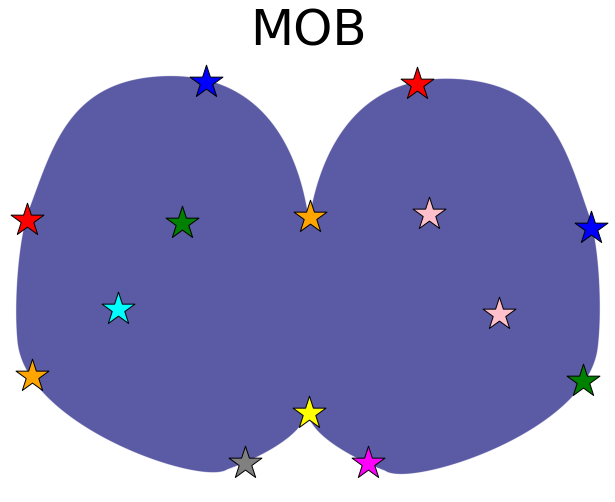

In [9]:
img = read_img(MOB_PTHS["image"])
lmk = read_lmk(MOB_PTHS["landmarks"])
viz_ref(img,lmk,marker_size=1200,title = "MOB", side_size = SIDE_SIZE, title_fontsize = TITLE_FONTSIZE)
if SAVE_MODE: plt.savefig(osp.join(REF_PLOT_OUT_DIR,f"{sample_name}.png"),bbox_inches = "tight",pad_inches = 0)
plt.show()


In [10]:
if SAVE_MODE: 
    with open(osp.join(N_LMK_OUT_DIR,f"{sample_name}.dat"),"w+") as f:
        n_lmk = lmk.shape[0]
        f.write(str(n_lmk))

## Mouse Hippocampus

In [11]:
sample_name = "mouse-hippocampus"

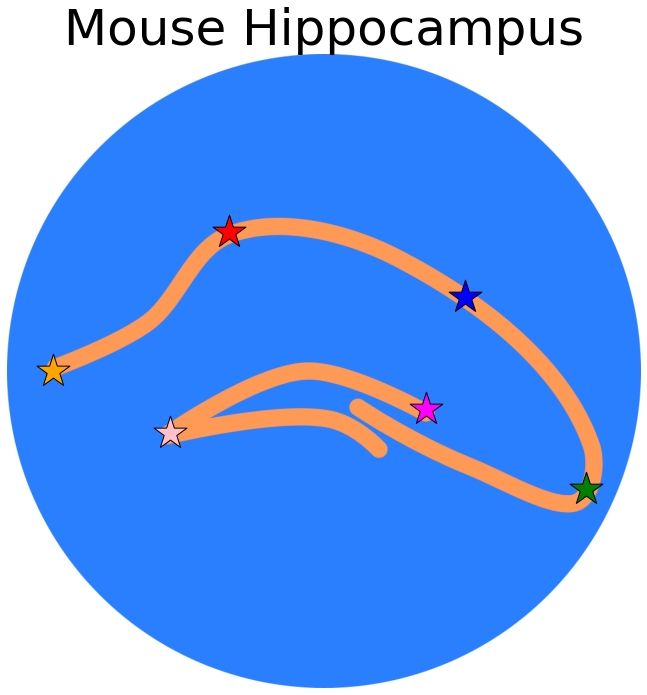

In [12]:
img = read_img(HIP_PTHS["image"])
lmk = read_lmk(HIP_PTHS["landmarks"])

viz_ref(img,lmk,marker_size=1200,title = "Mouse Hippocampus", side_size = SIDE_SIZE, title_fontsize = TITLE_FONTSIZE)
if SAVE_MODE: plt.savefig(osp.join(REF_PLOT_OUT_DIR,f"{sample_name}.png"),bbox_inches = "tight",pad_inches = 0)
plt.show()


In [13]:
if SAVE_MODE: 
    with open(osp.join(N_LMK_OUT_DIR,f"{sample_name}.dat"),"w+") as f:
        n_lmk = lmk.shape[0]
        f.write(str(n_lmk))

## Synthetic Data

In [51]:
sample_name = "synthetic"

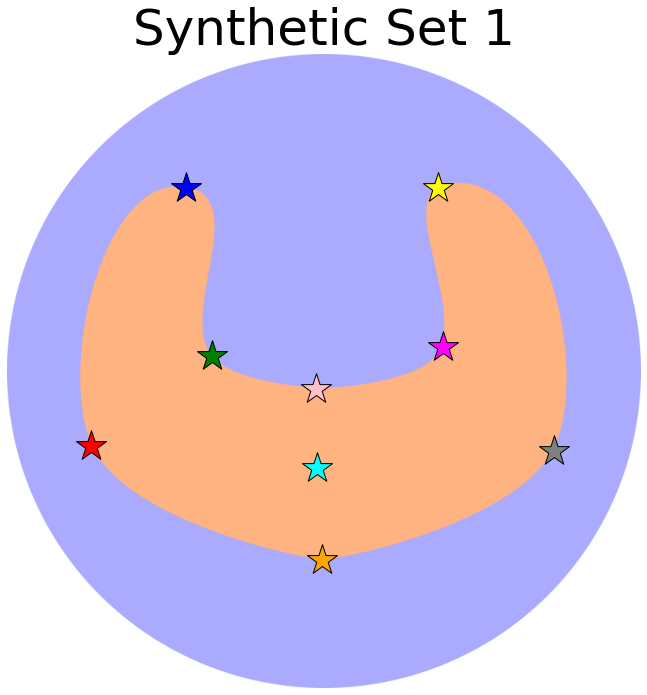

In [53]:
img = read_img(SYN_PTHS["image"])
lmk = read_lmk(SYN_PTHS["landmarks"])

viz_ref(img,lmk,marker_size=1000, title = "Synthetic Set 1", side_size = SIDE_SIZE, title_fontsize = TITLE_FONTSIZE)
if SAVE_MODE: plt.savefig(osp.join(REF_PLOT_OUT_DIR,f"{sample_name}.png"),bbox_inches = "tight",pad_inches = 0)
plt.show()


In [ ]:
if SAVE_MODE: 
    with open(osp.join(N_LMK_OUT_DIR,f"{sample_name}.dat"),"w+") as f:
        n_lmk = lmk.shape[0]
        f.write(str(n_lmk))

## Human Breast Cancer

In [16]:
sample_name = "human-breast-cancer"

In [ ]:
bcA = ad.read_h5ad(BCA_PTHS)

In [ ]:
img = bcA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["images"]["hires"]
sf = bcA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["scalefactors"]["tissue_hires_scalef"]

dia = bcA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["scalefactors"]["spot_diameter_fullres"] * sf
scalebar = dia * 500 / 55

lmk = bcA.uns["curated_landmarks"] * sf

viz_ref(img,
        lmk,
        marker_size=1200,
        title = "Human Breast Cancer (bcA)",
        title_fontsize=TITLE_FONTSIZE,
        side_size = SIDE_SIZE)

plt.plot([1700,1700+scalebar],
         [1600,1600],
         linewidth = 4,
         color ="black")

plt.scatter([1700,1700+scalebar],
            [1600,1600],marker ="|",
            s = 500,
            c ="black")

plt.text(x = 1700 + scalebar/2,
         y = 1700,
         s = r"500$\mu$m",
         horizontalalignment ="center",
         fontsize = 20)


plt.savefig(osp.join(REF_PLOT_OUT_DIR,f"{sample_name}.png"),bbox_inches = "tight",pad_inches = 0)
plt.show()


In [ ]:
if SAVE_MODE: 
    with open(osp.join(N_LMK_OUT_DIR,f"{sample_name}.dat"),"w+") as f:
        n_lmk = lmk.shape[0]
        f.write(str(n_lmk))

## Human Developmental Heart

In [76]:
sample_name = "human-developmental-heart"

In [77]:


DH_DATA_DIR = "../data/human-developmental-heart/curated/"
DH_NAMES = ["V10F24-105_A1.h5ad",
            "V10F24-105_B1.h5ad",
            "V10F24-105_C1.h5ad",
            "V10F24-105_D1.h5ad",
            "V10B01-014_A1.h5ad",
            "V10S28-368_D1.h5ad",
            "V10S28-371_A1.h5ad",
           ]


DH_DATA = {f"dh{string.ascii_uppercase[s]}":osp.join(DH_DATA_DIR,d) for s,d in enumerate(DH_NAMES)}
DH_DATA

{'dhA': '../data/human-developmental-heart/curated/V10F24-105_A1.h5ad',
 'dhB': '../data/human-developmental-heart/curated/V10F24-105_B1.h5ad',
 'dhC': '../data/human-developmental-heart/curated/V10F24-105_C1.h5ad',
 'dhD': '../data/human-developmental-heart/curated/V10F24-105_D1.h5ad',
 'dhE': '../data/human-developmental-heart/curated/V10B01-014_A1.h5ad',
 'dhF': '../data/human-developmental-heart/curated/V10S28-368_D1.h5ad',
 'dhG': '../data/human-developmental-heart/curated/V10S28-371_A1.h5ad'}

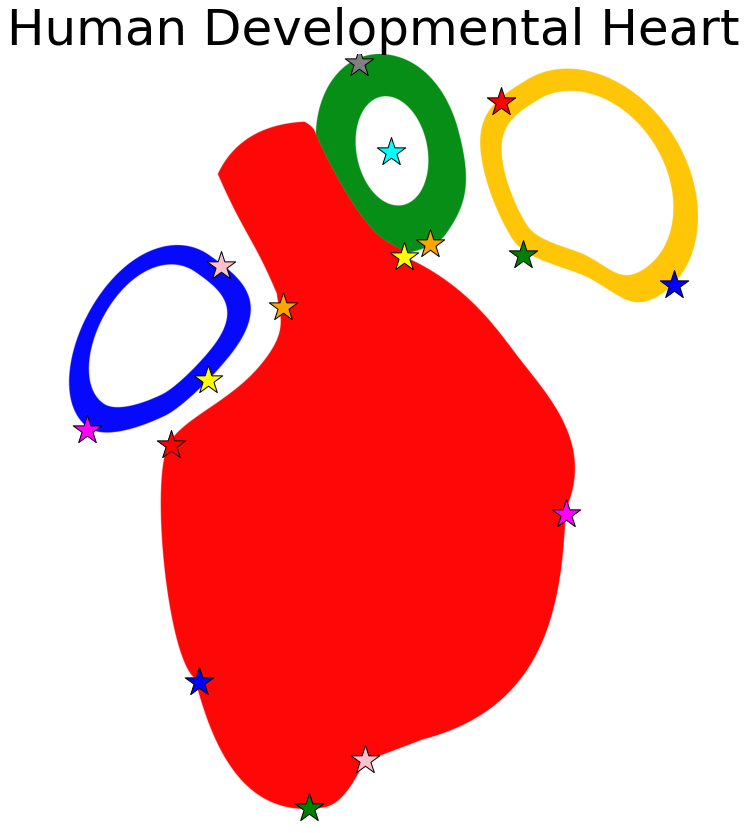

In [78]:
img = read_img(DH_PTHS["image"])
lmk = read_lmk(DH_PTHS["landmarks"])

viz_ref(img,lmk,marker_size=900,title = "Human Developmental Heart", side_size = SIDE_SIZE, title_fontsize = TITLE_FONTSIZE)
plt.savefig(osp.join(REF_PLOT_OUT_DIR,f"{sample_name}.png"),bbox_inches = "tight",pad_inches = 0)
plt.show()

In [79]:
if SAVE_MODE: 
    with open(osp.join(N_LMK_OUT_DIR,f"{sample_name}.dat"),"w+") as f:
        n_lmk = lmk.shape[0]
        f.write(str(n_lmk))

# Charted samples

## MOB

In [19]:
MOB_DATA_DIR = "../data/mob/charted/"
adatas = {p.split(".")[0]:ad.read_h5ad(osp.join(MOB_DATA_DIR,p)) for p in os.listdir(MOB_DATA_DIR)}
adatas = {f"Rep{k}_MOB" : adatas[f"Rep{k}_MOB"] for k \
          in sorted([ int(a.lstrip("Rep_").rstrip("_MOB")) for a in adatas.keys()])}

In [21]:
from scipy.spatial.distance import cdist
def get_phys_dist_st1k(adata,target = 500):
    crd = adata.obsm["spatial"]
    dmat = cdist(crd,crd)
    dmat[dmat==0] = np.inf
    min_d = np.min(dmat,axis=1).mean()
    return min_d * 500 / 200


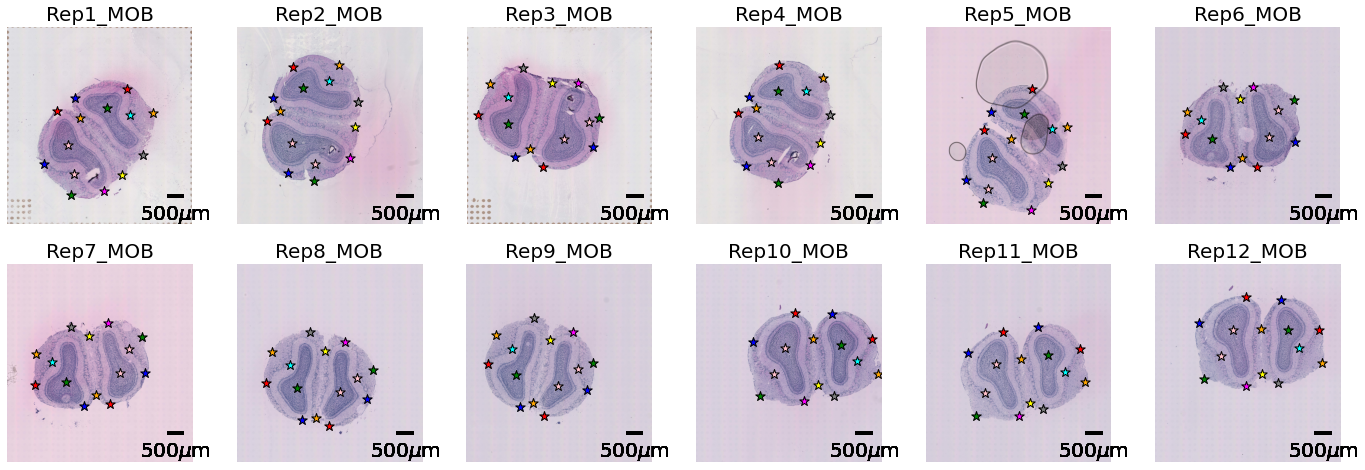

In [93]:
fig,ax = plt.subplots(2,6,figsize =(24,8))
marker_size = 100
sc_x = 1700
ax = ax.flatten()
for k,(name,adata) in enumerate(adatas.items()):
    img = adata.uns["spatial"][name]["images"]["hires"]
    sf = adata.uns["spatial"][name]["scalefactors"]["tissue_hires_scalef"]
    lmk = adata.uns["curated_landmarks"] *sf
    scalebar = get_phys_dist_st1k(adata) * sf
    ax[k].imshow(img)
    for ii in range(len(lmk)):
        ax[k].scatter(lmk[ii,0],
                     lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
        
        ax[k].plot([sc_x,sc_x+scalebar],[300,300],linewidth = 4,color ="black")

        ax[k].text(x = sc_x + scalebar/2,
                   y = 50,
                   s = r"500$\mu$m",
                   horizontalalignment ="center",
                   fontsize = 20)
    
        ax[k].set_title(name,fontsize=20)
    ax[k].invert_yaxis()
    ax[k].axis("off")
    
if SAVE_MODE: fig.savefig(osp.join(CHARTED_PLOT_OUT_DIR,"mob-2-rows.png"),bbox_inches = "tight",pad_inches = 0)

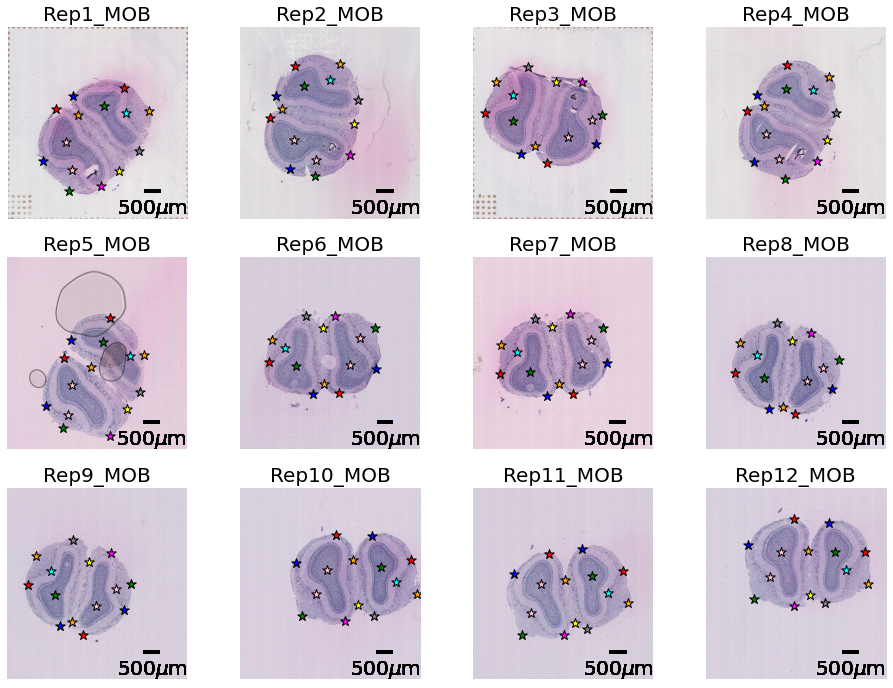

In [98]:
fig,ax = plt.subplots(3,4, figsize =(16,12))
marker_size = 100
sc_x = 1500
ax = ax.flatten()
for k,(name,adata) in enumerate(adatas.items()):
    img = adata.uns["spatial"][name]["images"]["hires"]
    sf = adata.uns["spatial"][name]["scalefactors"]["tissue_hires_scalef"]
    lmk = adata.uns["curated_landmarks"] *sf
    scalebar = get_phys_dist_st1k(adata) * sf
    ax[k].imshow(img)
    for ii in range(len(lmk)):
        ax[k].scatter(lmk[ii,0],
                     lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
        
        ax[k].plot([sc_x,sc_x+scalebar],[300,300],linewidth = 4,color ="black")

        ax[k].text(x = sc_x + scalebar/2,
                   y = 50,
                   s = r"500$\mu$m",
                   horizontalalignment ="center",
                   fontsize = 20)
    
        ax[k].set_title(name,fontsize=20)
        
    ax[k].invert_yaxis()
    ax[k].axis("off")

if SAVE_MODE: fig.savefig(osp.join(CHARTED_PLOT_OUT_DIR,"mob-3-rows.png"),bbox_inches = "tight",pad_inches = 0)

## Synthetic Data

In [64]:
SYN_TEMP_DIR = "../data/synthetic/templates/"
img_paths = [osp.join(SYN_TEMP_DIR,"imgs","t_{}.png".format(x)) for x in range(0,8)]
lmk_paths = [osp.join(SYN_TEMP_DIR,"landmarks","t_{}_landmarks.tsv".format(x)) for x in range(0,8)]

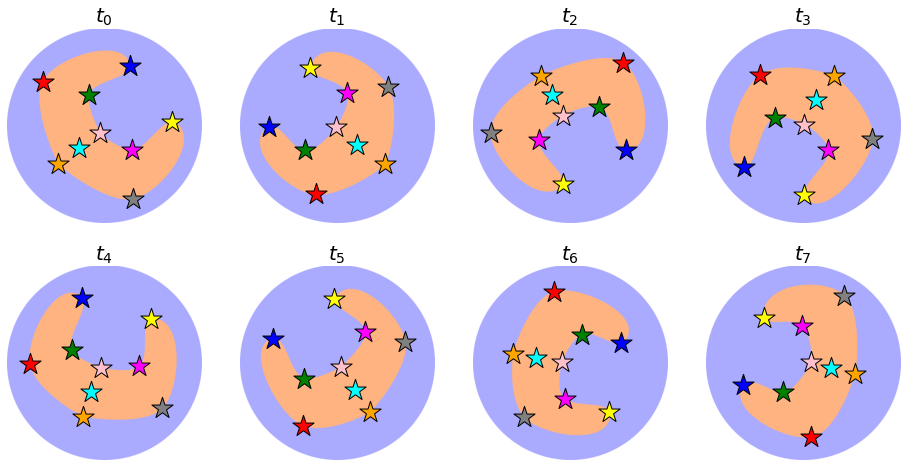

In [65]:
marker_size = 500
fig,ax = plt.subplots(2,4,figsize =(16,8))
ax = ax.flatten()
for k in range(len(img_paths)):
    img = read_img(img_paths[k])
    lmk = eg.ut.pd_to_np(read_lmk(lmk_paths[k]))
    ax[k].imshow(img)
    for ii in range(len(lmk)):
        ax[k].scatter(lmk[ii,0],
                     lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
    
    ax[k].axis("off")
    ax[k].set_title(r"$t_{}$".format(k),fontsize=20)
    
if SAVE_MODE: fig.savefig(osp.join(CHARTED_PLOT_OUT_DIR,"synthetic.png"),bbox_inches = "tight",pad_inches = 0)

## Human Breast Cancer

In [66]:
bcB = ad.read_h5ad(BCB_PTHS)
bcB

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3987 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'curated_landmarks', 'spatial'
    obsm: 'spatial'

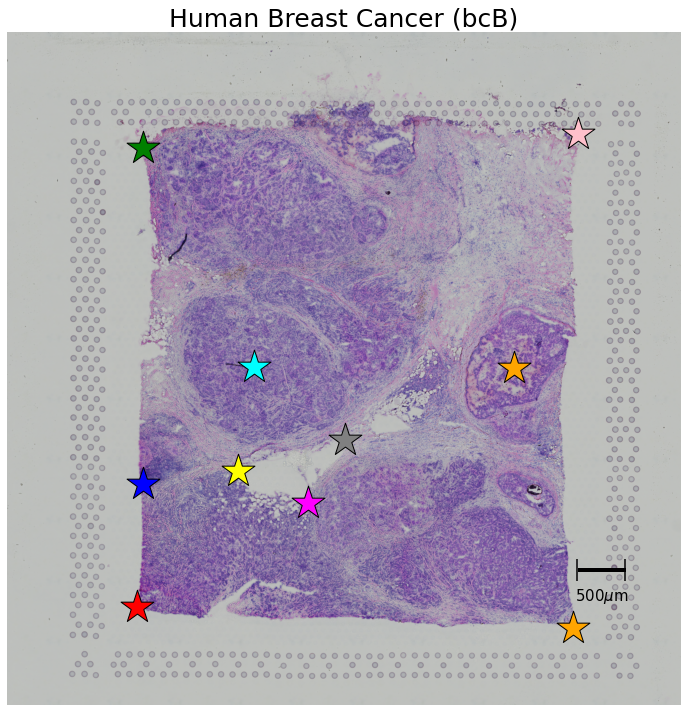

In [90]:
img = bcB.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_2"]["images"]["hires"]
sf = bcB.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_2"]["scalefactors"]["tissue_hires_scalef"]

dia = bcB.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_2"]["scalefactors"]["spot_diameter_fullres"] * sf
scalebar = dia * 500 / 55

lmk = bcB.uns["curated_landmarks"] * sf
viz_ref(img,lmk,marker_size=1200,side_size = 10)
plt.plot([1700,1700+scalebar],[1600,1600],linewidth = 4,color ="black")
plt.scatter([1692,1702+scalebar],[1600,1600],marker ="|",s = 500,c ="black")
plt.text(x = 1700 + scalebar/2,y = 1690,s = r"500$\mu$m",horizontalalignment ="center",fontsize = 15)
plt.title("Human Breast Cancer (bcB)",fontsize = 25)
if SAVE_MODE: plt.savefig(osp.join(CHARTED_PLOT_OUT_DIR,"human-breast-cancer.png"),bbox_inches = "tight",pad_inches = 0)
plt.show()

## Mouse Hippocampus

In [73]:
VIS_PTH = "../data/mouse-hippocampus/curated/hippo-visium.h5ad"
SS_PTH ="../data/mouse-hippocampus/curated/hippo-slide_seq.h5ad"

In [74]:
adata_1 = ad.read_h5ad(VIS_PTH)
adata_2 = ad.read_h5ad(SS_PTH)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


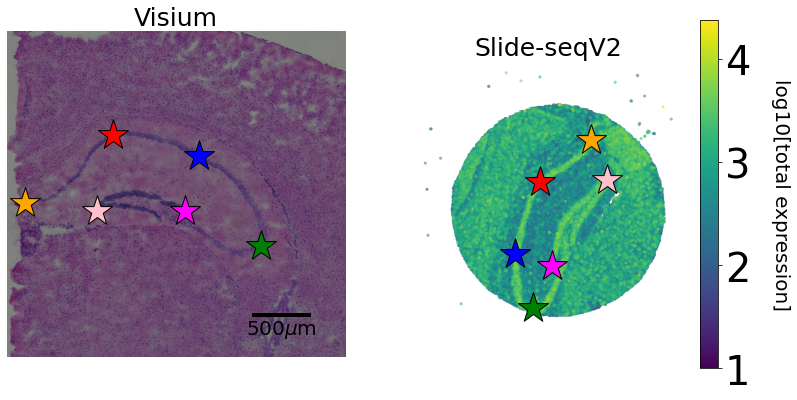

In [75]:
marker_size = 1000
img = adata_1.uns["spatial"]["V1_Adult_Mouse_Brain"]["images"]["hires"]
sf = adata_1.uns["spatial"]["V1_Adult_Mouse_Brain"]["scalefactors"]["tissue_hires_scalef"]
lmk = adata_1.uns["curated_landmarks"] * sf
figsize = np.array(img.shape[0:2]) / 100 / 3
figsize[0] *= 2
fig,axx = plt.subplots(1,2,figsize=figsize)


ax = axx[0]

ax.imshow(img)


for ii in range(len(lmk)):
        ax.scatter(lmk[ii,0],
                    lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
        
crd = adata_1.obsm["spatial"] * sf
xlim = [min(crd[:,0])*0.9,max(crd[:,0])*1.1]
ylim = [min(crd[:,1])*0.9,max(crd[:,1])*1.1]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.invert_yaxis()
ax.axis("off")

dia = adata_1.uns["spatial"]["V1_Adult_Mouse_Brain"]["scalefactors"]["spot_diameter_fullres"] * sf
scalebar = dia * 500 / 55

sc_x = 1000
sc_y = 1000
ax.plot([sc_x,sc_x+scalebar],[sc_y,sc_y],linewidth = 4,color ="black")

ax.text(x = sc_x + scalebar/2,y = sc_y + 50,s = r"500$\mu$m",horizontalalignment ="center",fontsize = 20)

ax = axx[1]

exp = np.array(adata_2.X.sum(axis=1)).flatten()
exp = np.log10(exp)

ordr = np.argsort(exp)
sca = ax.scatter(adata_2.obsm["spatial"][ordr,0],
                adata_2.obsm["spatial"][ordr,1],
                c = exp[ordr],
                s = 5,
                alpha = 0.4,
               )
if landmarks:
    for ii in range(len(adata_2.uns["curated_landmarks"])):
        ax.scatter(adata_2.uns["curated_landmarks"].values[ii,0],
                    adata_2.uns["curated_landmarks"].values[ii,1],
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    marker = "*",
                    edgecolor ="black",
                    s = marker_size,
                   )
ax.set_aspect("equal")
ax.axis("off")
ax.invert_yaxis()
cbar = fig.colorbar(sca)
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.tick_params(labelsize=40)
cbar.set_label("log10[total expression]", fontsize = 20, rotation=270,labelpad = 40)

axx[0].set_title("Visium",fontsize = 25)
axx[1].set_title("Slide-seqV2",fontsize = 25)

if SAVE_MODE:
    fig.savefig(osp.join(CHARTED_PLOT_OUT_DIR,"mouse-hippocampus.png"),bbox_inches = "tight",pad_inches = 0)

## Developmental Heart

In [80]:
for name,pth in DH_DATA.items():
    _adata = ad.read_h5ad(pth)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


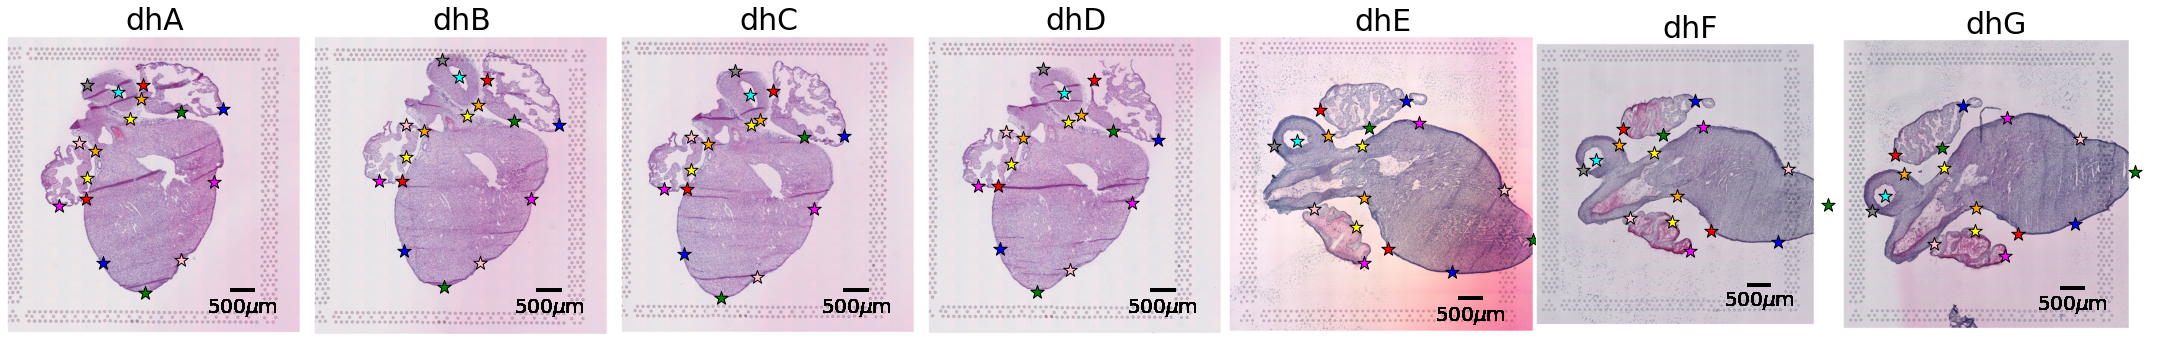

In [81]:
marker_size = 200
sc_x = 1500
side_size = 5.5
n_cols = 7
n_rows = 1
fig,ax = plt.subplots(n_rows,n_cols,figsize = (n_cols * side_size,n_rows * side_size))
fig.subplots_adjust(wspace = 0,hspace = 0.2)
ax = ax.flatten()
for k,(name,pth) in enumerate(DH_DATA.items()):
    
    _adata = ad.read_h5ad(pth)
    sample_name = osp.basename(pth).rstrip(".h5ad")
    
    img = _adata.uns["spatial"][sample_name]["images"]["hires"]
    sf = _adata.uns["spatial"][sample_name]["scalefactors"]["tissue_hires_scalef"]
    lmk = _adata.uns["curated_landmarks"] * sf
    dia = _adata.uns["spatial"][sample_name]["scalefactors"]["spot_diameter_fullres"] * sf
    scalebar = dia * 500 / 55

    ax[k].imshow(img)
    for ii in range(len(lmk)):
            ax[k].scatter(lmk[ii,0],
                         lmk[ii,1],
                        marker = "*",
                        c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                        s = marker_size,
                        edgecolor ="black",
                       )

            ax[k].plot([sc_x,sc_x+scalebar],[1700,1700],linewidth = 4,color ="black")

            ax[k].text(x = sc_x + scalebar/2,
                       y = 1850,
                       s = r"500$\mu$m",
                       horizontalalignment ="center",
                       fontsize = 20)

            ax[k].set_title(name,fontsize=30)
    
for axx in ax: axx.axis("off")
if SAVE_MODE: fig.savefig(osp.join(CHARTED_PLOT_OUT_DIR,"human-developmental-heart.png"),bbox_inches = "tight",pad_inches = 0)